### Predict the fare amount of future rides using regression analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Loading the Dataset**
First we load the dataset and find out the number of columns, rows, NULL values, etc.

In [56]:
uber= pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\uber.csv')
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

# Handle Missing Data
we delete first and second column.
because keys and id are not useful for pediction.

In [6]:
uber_2=uber.drop(['Unnamed: 0','key'],axis=1)

In [7]:
uber_2.shape

(200000, 7)

In [8]:
uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
uber_2.dropna(axis=0,inplace=True)

In [10]:
uber_2.shape

(199999, 7)

In [11]:

uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## **Harvesine formula**
![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-7b7d66229e4a0b6c7bbf52b95a807dc4_l3.svg)

Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.




In [13]:
def haversine (lon_1, lon_2, lat_1, lat_2):

    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians


    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    #  r=6371.0  earth radius in km
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km

In [14]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)

In [15]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


## **Scatter plot**
 scatter plot is a type of graph that shows the relationship between two sets of data. It uses dots to represent each data point, with one set of data shown on the horizontal axis and the other set of data shown on the vertical axis.

 we take Distance and Fare amount

Text(0, 0.5, 'fare_amount')

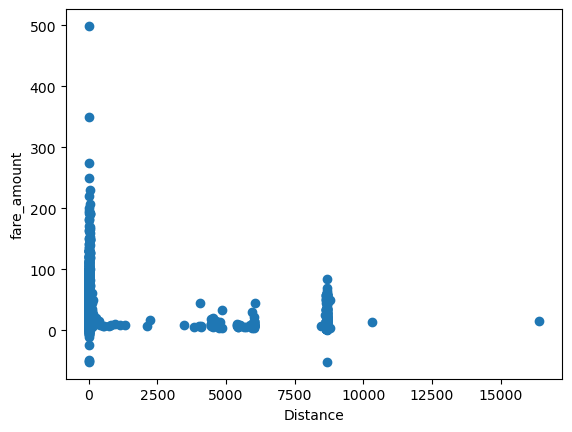

In [16]:

plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

### OUTLIERS

We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

In [17]:
uber_2.drop(uber_2[uber_2['Distance'] > 60].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] < 0].index, inplace = True)

uber_2.drop(uber_2[uber_2['fare_amount'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] < 0].index, inplace = True)

Text(0, 0.5, 'fare_amount')

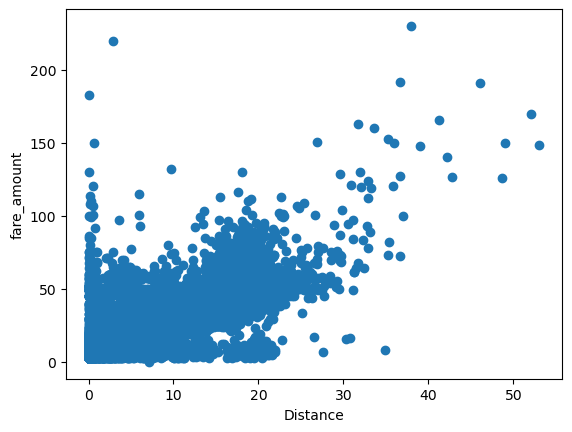

In [18]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [19]:
uber_2.shape

(193490, 8)

In [20]:
uber_3=uber_2.drop(uber_2[uber_2['Distance'] <1].index)

In [21]:
uber_3.shape

(163894, 8)

In [22]:
uber_2.drop(uber_2[uber_2['fare_amount'] > 100].index, inplace = True)

In [23]:
uber_2.shape

(193436, 8)

In [24]:
uber_2.drop(uber_2[ (uber_2['Distance']<1)].index, inplace = True )

In [25]:
uber_2.shape

(163849, 8)

In [26]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163849 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        163849 non-null  float64
 1   pickup_datetime    163849 non-null  object 
 2   pickup_longitude   163849 non-null  float64
 3   pickup_latitude    163849 non-null  float64
 4   dropoff_longitude  163849 non-null  float64
 5   dropoff_latitude   163849 non-null  float64
 6   passenger_count    163849 non-null  int64  
 7   Distance           163849 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.3+ MB


Text(0, 0.5, 'fare_amount')

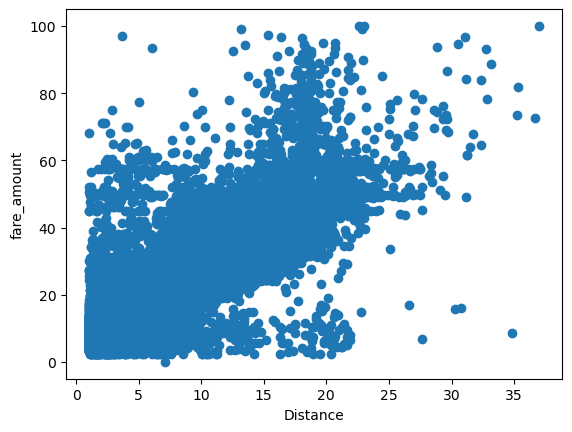

In [27]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [28]:
uber_2.shape

(163849, 8)

## **Date and Time**

Separating the date and time into separate columns for more usability.

In [29]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])

uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Day of Week_num'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

uber_2['counter'] = 1

In [30]:
uber_2.shape

(163849, 15)

In [31]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1


In [32]:
uber_2['pickup'] = uber_2['pickup_latitude'].round(3).astype(str) + "," + uber_2['pickup_longitude'].round(3).astype(str)
uber_2['drop off'] = uber_2['dropoff_latitude'].round(3).astype(str) + "," + uber_2['dropoff_longitude'].round(3).astype(str)

In [33]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.738,-74.0","40.723,-74.0"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728,-73.994","40.75,-73.995"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1,"40.741,-74.005","40.773,-73.963"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.791,-73.976","40.803,-73.965"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744,-73.925","40.761,-73.973"


### **Data Visualizations**

Finding the trends in the data variables

### **Average Yearly Trips**

In [34]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [35]:
for i in range(2009, 2016):
    x = uber_2.loc[uber_2['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)
# print("Average trips a year: ")
# print(year, no_of_trips)
print(no_of_trips[1],no_of_trips[2])
year_no_trip={}
n_tmp=0
for i in year:

  for j in range(0,len(no_of_trips)):
    year_no_trip.update({i:no_of_trips[n_tmp]})
    n_tmp+=1
    break
print(year_no_trip)

24562 26086
{2009: 24846, 2010: 24562, 2011: 26086, 2012: 26618, 2013: 25803, 2014: 24653, 2015: 11281}


<BarContainer object of 7 artists>

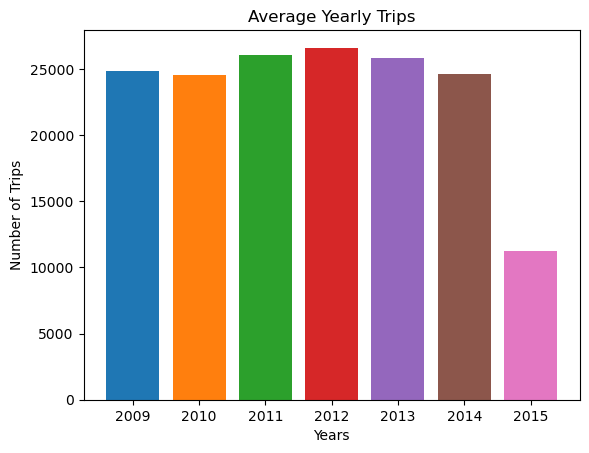

In [36]:
plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, no_of_trips, color=colors)

### **Average Monthly Trips**

{'Jan': 14243, 'Feb': 13511, 'Mar': 15321, 'Apr': 15269, 'May': 15576, 'Jun': 14628, 'Jul': 12460, 'Aug': 11701, 'Sep': 12553, 'Oct': 13301, 'Nov': 12685, 'Dec': 12601}


<BarContainer object of 12 artists>

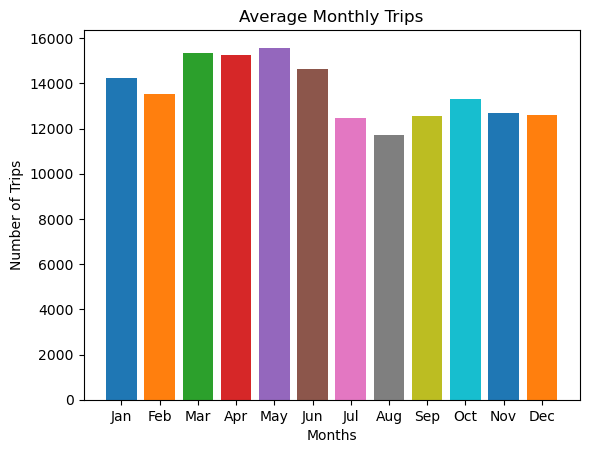

In [37]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

color_list = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # olive
    "#17becf",  # cyan
    "#aec7e8",  # light blue
    "#ffbb78"   # light orange
]  #hexadecimal colour code

for i in range(1, 13):
    x = uber_2.loc[uber_2['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

# print("Average trips a Month: ")
# print(month, no_of_trips)

month_no_trip={}
n_tmp=0
for i in month:

  for j in range(0,len(no_of_trips)):
    month_no_trip.update({i:no_of_trips[n_tmp]})
    n_tmp+=1
    break
print(month_no_trip)

plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, no_of_trips, color=colors)

### **Average Daily Trips**

{'Mon': 20621, 'Tue': 22931, 'Wed': 23507, 'Thu': 24432, 'Fri': 25175, 'Sat': 25107, 'Sun': 22076}


<BarContainer object of 7 artists>

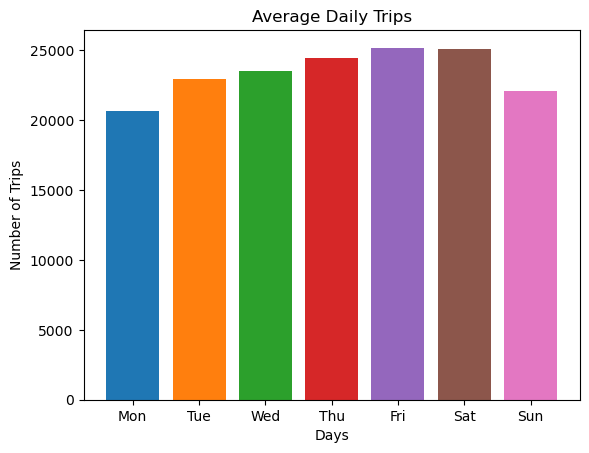

In [38]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = uber_2.loc[uber_2['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

# print("Average trips by Days: ")
# print(day, no_of_trips)

day_no_trip={}
n_tmp=0
for i in day:

  for j in range(0,len(no_of_trips)):
    day_no_trip.update({i:no_of_trips[n_tmp]})
    n_tmp+=1
    break
print(day_no_trip)

plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, no_of_trips, color=colors)

### **Rides vs Time**

Relation between average number of rides over a period of time.


In [39]:
year_vs_trips = uber_2.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean'))



In [40]:
year_vs_trips.head()

no_of_trips  Average_fair  Total_fair  Avg_distance
Year Month                                                     
2009 1             2043     10.498116    21447.65      3.529094
     2             1840     10.569266    19447.45      3.563364
     3             2210     11.042059    24402.95      3.734729
     4             2114     10.959342    23168.05      3.687200
     5             2190     10.945137    23969.85      3.691128

In [41]:
year_vs_trips = uber_2.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips.head()

,Year,Month,no_of_trips,Average_fair,Total_fair,Avg_distance
0,2009,1,2043,10.498116,21447.65,3.529094
1,2009,2,1840,10.569266,19447.45,3.563364
2,2009,3,2210,11.042059,24402.95,3.734729
3,2009,4,2114,10.959342,23168.05,3.687200
4,2009,5,2190,10.945137,23969.85,3.691128


In [42]:
year_vs_trips['avg_no_of_trips'] = (year_vs_trips['no_of_trips']/30).round(3)
year_vs_trips['month_year'] = " "+year_vs_trips['Month'].astype(str) +","+ year_vs_trips['Year'].astype(str)
year_vs_trips.head()


,Year,Month,no_of_trips,Average_fair,Total_fair,Avg_distance,avg_no_of_trips,month_year
0,2009,1,2043,10.498116,21447.65,3.529094,68.100,"1,2009"
1,2009,2,1840,10.569266,19447.45,3.563364,61.333,"2,2009"
2,2009,3,2210,11.042059,24402.95,3.734729,73.667,"3,2009"
3,2009,4,2114,10.959342,23168.05,3.687200,70.467,"4,2009"
4,2009,5,2190,10.945137,23969.85,3.691128,73.000,"5,2009"


<Axes: title={'center': 'No of trips vs Months'}, xlabel='January, 2009 - June, 2015', ylabel='No of Trips'>

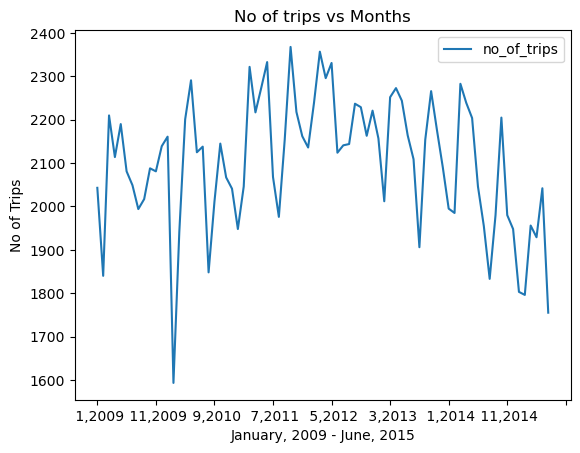

In [43]:
year_vs_trips.plot(kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

### **Heat-Map**

A heat map is a visual tool that uses color to represent the magnitude of data values. It's often used to show patterns or relationships between different variables.
A heat map to illustrate at what time of day and week, people are using Uber the most.

A heat map to illustrate at what time of day and week, people are using Uber the most.

In [44]:
import seaborn as sns

df_1 = uber_2[['Distance', 'Day of Week_num', 'Hour']].copy()

df_1.head(100)

,Distance,Day of Week_num,Hour
0,1.68,3,19
1,2.46,4,20
2,5.04,0,21
3,1.66,4,8
4,4.48,3,17
...,...,...,...
123,1.97,0,9
124,3.74,5,1
125,2.18,2,17
126,1.22,1,12


In [45]:
df_h = df_1.copy()

df_h = df_h.groupby(['Hour', 'Day of Week_num']).mean()
df_h = df_h.unstack(level=0)

In [46]:
df_h

Distance                                                    \
Hour                   0         1         2         3         4         5    
Day of Week_num                                                               
0                4.910657  4.944848  4.769196  4.921523  6.864895  6.364067   
1                4.444028  4.728453  4.462579  4.696835  5.434264  5.901314   
2                4.385075  4.375516  4.264983  4.962690  6.149471  5.949466   
3                4.439409  4.653106  4.166937  4.392217  5.573722  6.101569   
4                4.226731  4.402861  4.415052  4.742882  5.245688  6.876214   
5                3.953557  4.148911  4.326300  4.210445  5.161018  5.926571   
6                3.748147  4.055203  4.135035  4.349063  5.009232  6.124387   

                                                         ...            \
Hour                   6         7         8         9   ...        14   
Day of Week_num                                          ...             
0                4.477316  3.854439  3.559487  3.574406  ...  4.021124   
1                4.184078  3.697743  3.321974  3.120186  ...  3.672665   
2                4.367555  3.663936  3.286607  3.286568  ...  3.637786   
3                4.375315  3.778832  3.476764  3.414932  ...  3.780586   
4                4.613526  3.796774  3.372014  3.405077  ...  3.894970   
5                6.018357  4.851692  3.882917  3.687666  ...  3.677661   
6                5.423881  5.135310  4.441790  4.024513  ...  4.196869   

                                                                             \
Hour                   15        16        17        18        19        20   
Day of Week_num                                                               
0                3.886144  3.927989  3.679129  3.581681  3.603402  3.780277   
1                3.792746  3.871972  3.390376  3.280684  3.446761  3.744662   
2                3.714054  3.921214  3.578773  3.494822  3.380879  3.784976   
3                3.895424  3.939875  3.898671  3.519179  3.475507  3.613088   
4                3.677929  3.827275  3.640761  3.350514  3.402692  3.619436   
5                3.559286  3.706266  3.606887  3.517129  3.208952  3.492795   
6                4.301618  4.062912  4.184779  3.925766  3.847979  4.197430   

                                               
Hour                   21        22        23  
Day of Week_num                                
0                3.946575  4.195622  4.424105  
1                3.907938  4.045061  4.345384  
2                3.966142  3.969859  4.076734  
3                3.891366  3.863578  4.104143  
4                3.796590  3.981716  3.810791  
5                3.406340  3.557335  3.757692  
6                3.951123  4.318326  4.605128  

[7 rows x 24 columns]

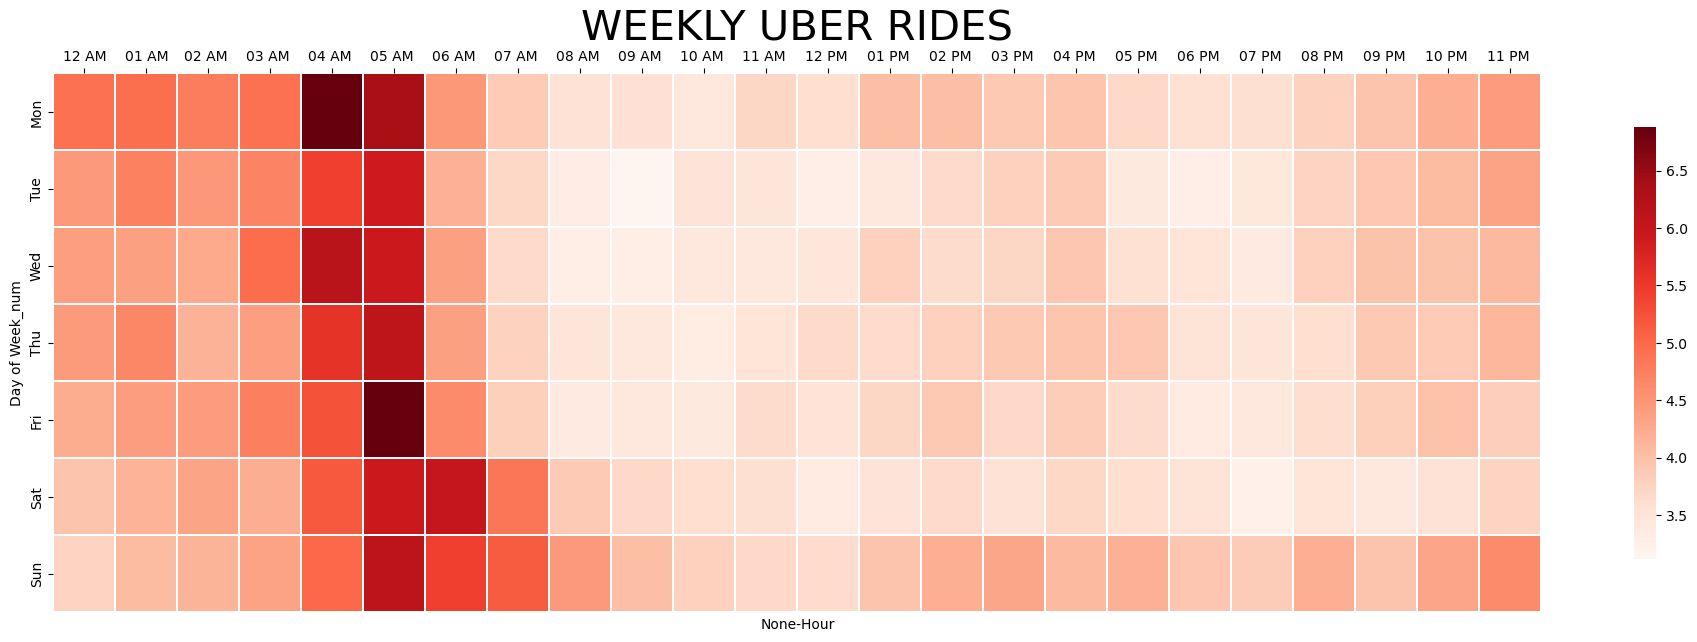

In [47]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds",
           linewidth=.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ',
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) +.5 , labels=xticks_labels)
plt.yticks(np.arange(7) +.5 , labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 30})

plt.show()

### **Statistics**

Some general statistical information about the data

In [48]:
import statistics as st

print("Mean of fare prices is % s "
         % (st.mean(uber_2['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(uber_2['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(uber_2['fare_amount'])))

Mean of fare prices is 12.347895379282145 
Median of fare prices is 9.3 
Standard Deviation of Fare Prices is 9.580236347067169 


### **Distance**

In [49]:
import statistics as st

print("Mean of Distance is % s "
         % (st.mean(uber_2['Distance'])))

print("Median of Distance is % s "
         % (st.median(uber_2['Distance'])))

print("Standard Deviation of Distance is % s "
                % (st.stdev(uber_2['Distance'])))

Mean of Distance is 3.8318230199757095 
Median of Distance is 2.56 
Standard Deviation of Distance is 3.6820303138310373 


# **Coorelation Matrix**

A correlation matrix is a tool used to analyze the relationships between variables in a dataset.

To find the two variables that have the most inter-dependence

In [51]:
# Identify non-numeric columns
non_numeric_cols = [col for col in uber_2.columns if not pd.api.types.is_numeric_dtype(uber_2[col])]

# Exclude non-numeric columns from correlation calculation
numeric_cols = uber_2.columns.difference(non_numeric_cols)
corr = uber_2[numeric_cols].corr()

# Display correlation matrix with background gradient
corr.style.background_gradient(cmap='BuGn')


C:\Users\ADMIN\Anacondaaa\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\ADMIN\Anacondaaa\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Day,Day of Week_num,Distance,Hour,Month,Year,counter,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
Day,1.000000,0.005681,-0.000703,0.005112,-0.016895,-0.011405,nan,-0.018564,0.018262,-0.001214,0.002571,-0.017634,0.018232
Day of Week_num,0.005681,1.000000,0.013721,-0.091040,-0.010128,0.006261,nan,-0.008413,0.007860,0.000540,0.035804,-0.008415,0.007469
Distance,-0.000703,0.013721,1.000000,-0.038831,0.010854,0.026668,nan,-0.007174,0.010571,0.902661,0.008528,-0.000158,0.011767
Hour,0.005112,-0.091040,-0.038831,1.000000,-0.003408,0.002349,nan,0.000787,-0.001213,-0.023781,0.014766,-0.000343,-0.000050
Month,-0.016895,-0.010128,0.010854,-0.003408,1.000000,-0.113721,nan,0.007653,-0.007384,0.024167,0.009010,0.007143,-0.007443
Year,-0.011405,0.006261,0.026668,0.002349,-0.113721,1.000000,nan,-0.013856,0.013637,0.137803,0.007578,-0.012956,0.013781
counter,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dropoff_latitude,-0.018564,-0.008413,-0.007174,0.000787,0.007653,-0.013856,nan,1.000000,-0.997443,-0.013579,-0.010042,0.937307,-0.997461
dropoff_longitude,0.018262,0.007860,0.010571,-0.001213,-0.007384,0.013637,nan,-0.997443,1.000000,0.016010,0.009934,-0.935047,0.999832
fare_amount,-0.001214,0.000540,0.902661,-0.023781,0.024167,0.137803,nan,-0.013579,0.016010,1.000000,0.014875,-0.013133,0.017921


# **Standardization**
For more accurate results on our linear regression model

There is some coorelation between the distance and fare amount. So we will implement our simple linear regression model using these two varaibles.

**Assigning the dependent and independent variable**

In [52]:
X = uber_2['Distance'].values.reshape(-1, 1)        #Independent Variable
y = uber_2['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [54]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.50603242]
 [-0.48515604]
 [ 0.05762972]
 ...
 [ 1.9365035 ]
 [ 0.22464072]
 [ 0.18288797]]
[[-0.58441387]
 [-0.37257358]
 [ 0.32812893]
 ...
 [ 2.44924776]
 [-0.07925625]
 [ 0.43133318]]


# **Splitting the Dataset**
Training and Test Set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)